# NN weights visualisation

In [18]:
import pickle
import numpy as np

fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_.pkl', 'rb')
weights = pickle.load(fileID)
fileID.close()

weights = np.asarray(weights)

numLayers = int(weights.shape[0]/2)

for i in range(numLayers):
    j = 2*i
    print(j)
    print((weights[j].T).shape)
    j = 2*i + 1
    print(j)


0
(20, 31)
1
2
(10, 20)
3
4
(4, 10)
5


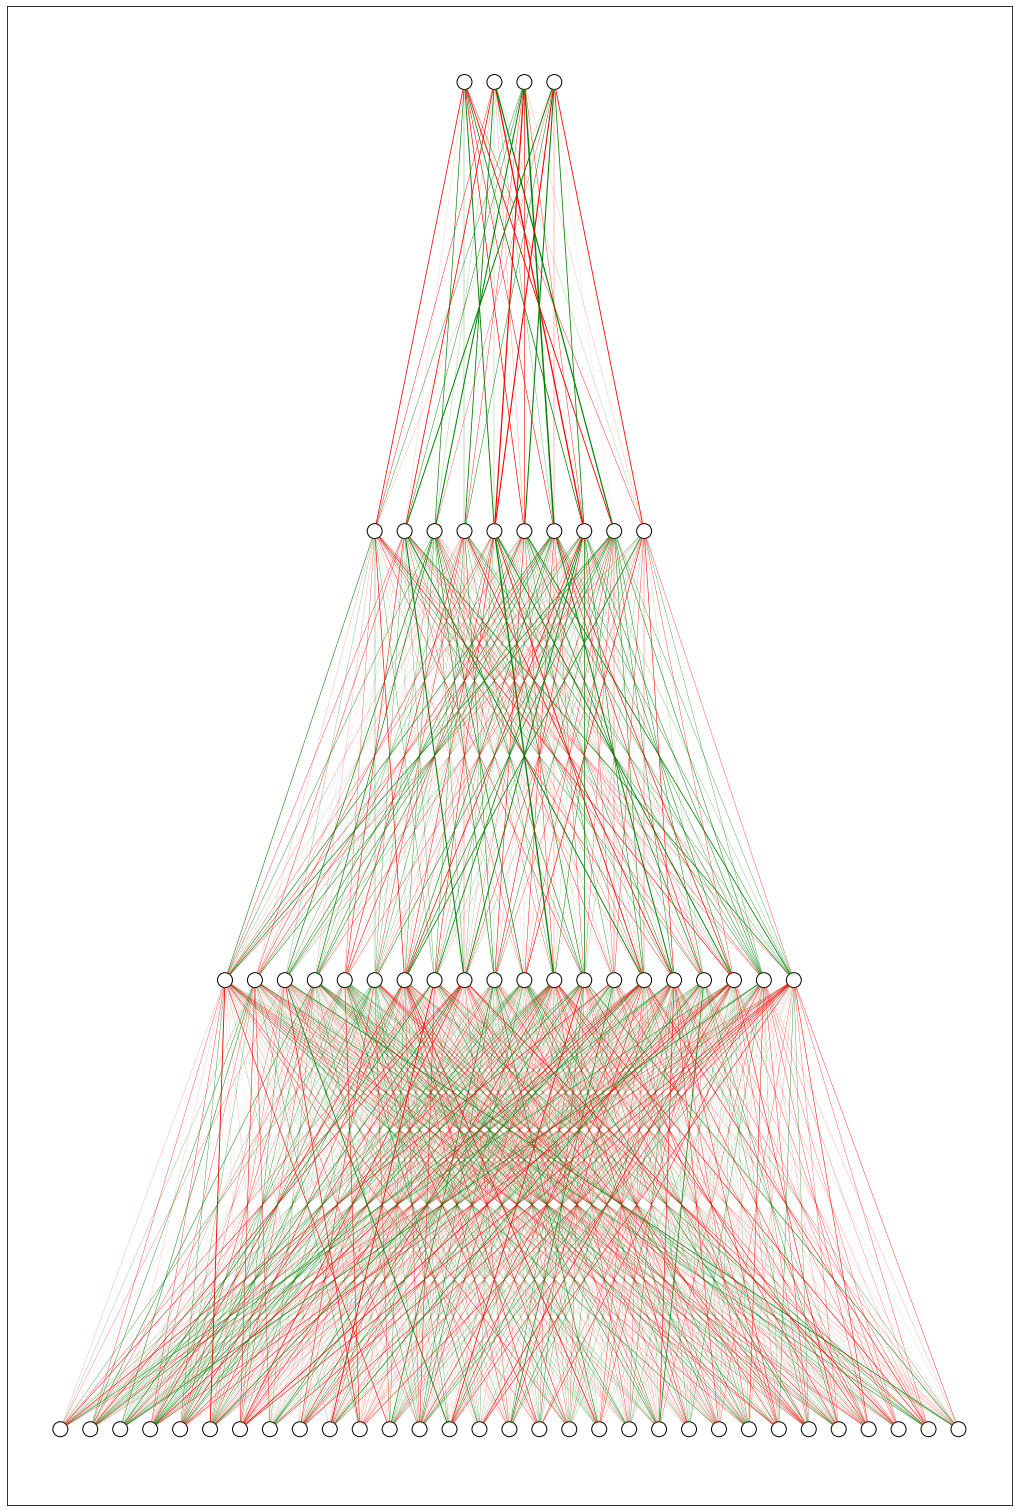

<Figure size 432x288 with 0 Axes>

In [19]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, weights):
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)
        self.weights = weights

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return horizontal_distance_between_neurons * (number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, _linewidth):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = neuron_radius * sin(angle)
        y_adjustment = neuron_radius * cos(angle)
        line_x_data = (neuron1.x - x_adjustment, neuron2.x + x_adjustment)
        line_y_data = (neuron1.y - y_adjustment, neuron2.y + y_adjustment)
        if (_linewidth <= 0):
            line = pyplot.Line2D(line_x_data, 
                                 line_y_data, 
                                 color='r',
                                 linewidth=_linewidth*1.5)
                                 #linewidth=0.3)
        else:
            line = pyplot.Line2D(line_x_data, 
                                 line_y_data, 
                                 color='g',
                                 linewidth=_linewidth*1.5)
                                 #linewidth=0.3)
        #end            
        pyplot.gca().add_line(line)
    def draw(self):
        for this_layer_neuron_index in range(len(self.neurons)):
            neuron = self.neurons[this_layer_neuron_index]
            neuron.draw()
            if self.previous_layer:
                for previous_layer_neuron_index in range(len(self.previous_layer.neurons)):
                    previous_layer_neuron = self.previous_layer.neurons[previous_layer_neuron_index]
                    weight = self.previous_layer.weights[this_layer_neuron_index, previous_layer_neuron_index]
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weight)


class NeuralNetwork():
    def __init__(self):
        self.layers = []

    def add_layer(self, number_of_neurons, weights=None):
        layer = Layer(self, number_of_neurons, weights)
        self.layers.append(layer)

    def draw(self):
        for layer in self.layers:
            layer.draw()
        pyplot.axis('scaled')
        pyplot.show()


vertical_distance_between_layers = 30
horizontal_distance_between_neurons = 2
neuron_radius = 0.5
number_of_neurons_in_widest_layer = 31
network = NeuralNetwork()
# weights to convert from 10 outputs to 4 (decimal digits to their binary representation)

pyplot.figure(figsize=(18,100))
fig = pyplot.gca()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

"""
network.add_layer(wghs1.shape[1], wghs1)
network.add_layer(wghs2.shape[1], wghs2)
network.add_layer(wghs3.shape[1], wghs3)
network.add_layer(wghs3.shape[0])
"""

for i in range(numLayers-1):
    wghs = weights[2*i]
    network.add_layer((wghs.T).shape[1], wghs.T)
network.add_layer((weights[-2].T).shape[1], weights[-2].T)
network.add_layer((weights[-2].T).shape[0])

network.draw()
pyplot.show()
pyplot.savefig("WeightedNetwork.svg", format="svg")

# NN as Graph

Starting from weights it should be possible to derive a **graph** representation, such as $\mathcal{G} = \{ \mathcal{N}, \mathcal{E} \}$.

In the following cell, the commands to ru the `mfinder1.2.exe` program ([Uri Alon webpage]("http://www.weizmann.ac.il/mcb/UriAlon/download/network-motif-software", "Weizmann Institute of Science")) in a nearby directory. Once the graph representation of the present work neural network is done, it can be fed to the aforementioned program.

In [ ]:
!echo %cd%
!..\UriAlon_mfinder_prog\mfinder1.2\mfinder1.2.exe ..\UriAlon_mfinder_prog\mfinder1.2\network_exmp.txt

### Graph representation of NN

In [41]:
weights[0].shape

(31, 20)